# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define lists 
city_name = []
cloudy_list = []
country_list = []
dates = []
humidity = []
lats_list = []
lngs_list = []
max_temp = [] 
wind_speed = [] 


print("Beginning Data Retrieval")
print("-----------------------------")

count = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    response = requests.get(query_url).json()
    
    try:        
        city_name.append(response["name"])
        country_list.append(response["sys"]["country"])
        cloudy_list.append(response["clouds"]["all"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {count} of Set {count} | {city}")
        count+=1        
    except (KeyError):
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 2 of Set 2 | hervey bay
Processing Record 3 of Set 3 | port elizabeth
Processing Record 4 of Set 4 | rio bananal
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 6 | bogdanita
Processing Record 7 of Set 7 | rocha
Processing Record 8 of Set 8 | vaini
Processing Record 9 of Set 9 | bluff
Processing Record 10 of Set 10 | upernavik
Processing Record 11 of Set 11 | provideniya
Processing Record 12 of Set 12 | lavrentiya
Processing Record 13 of Set 13 | mar del plata
Processing Record 14 of Set 14 | ushuaia
Processing Record 15 of Set 15 | kovur
Processing Record 16 of Set 16 | avarua
Processing Record 17 of Set 17 | thompson
Processing Record 18 of Set 18 | port alfred
Processing Record 19 of Set 19 | castro
Processing Record 20 of Set 20 | mildura
Processing Record 21 of Set 21 | puerto ayora
Processing Record 22 of Set 22 | cape town


Processing Record 181 of Set 181 | ivrea
Processing Record 182 of Set 182 | opuwo
Processing Record 183 of Set 183 | jacksonville
Processing Record 184 of Set 184 | bang len
Processing Record 185 of Set 185 | longyearbyen
Processing Record 186 of Set 186 | durango
Processing Record 187 of Set 187 | cumana
Processing Record 188 of Set 188 | vao
Processing Record 189 of Set 189 | cherskiy
Processing Record 190 of Set 190 | sofiyivka
Processing Record 191 of Set 191 | flin flon
Processing Record 192 of Set 192 | bukama
Processing Record 193 of Set 193 | namibe
Processing Record 194 of Set 194 | vila franca do campo
Processing Record 195 of Set 195 | san jose
City not found. Skipping...
Processing Record 196 of Set 196 | bodden town
Processing Record 197 of Set 197 | arman
Processing Record 198 of Set 198 | klaksvik
City not found. Skipping...
City not found. Skipping...
Processing Record 199 of Set 199 | talnakh
Processing Record 200 of Set 200 | cairns
Processing Record 201 of Set 201 | 

Processing Record 355 of Set 355 | eyl
Processing Record 356 of Set 356 | vanimo
Processing Record 357 of Set 357 | maragogi
Processing Record 358 of Set 358 | ceres
City not found. Skipping...
City not found. Skipping...
Processing Record 359 of Set 359 | awbari
City not found. Skipping...
Processing Record 360 of Set 360 | atar
Processing Record 361 of Set 361 | havoysund
Processing Record 362 of Set 362 | havre-saint-pierre
Processing Record 363 of Set 363 | bouna
Processing Record 364 of Set 364 | kathmandu
Processing Record 365 of Set 365 | kingsport
City not found. Skipping...
Processing Record 366 of Set 366 | ulladulla
City not found. Skipping...
Processing Record 367 of Set 367 | port lincoln
Processing Record 368 of Set 368 | alexandria
Processing Record 369 of Set 369 | sakyla
Processing Record 370 of Set 370 | kirakira
Processing Record 371 of Set 371 | ambovombe
Processing Record 372 of Set 372 | newark
Processing Record 373 of Set 373 | navirai
Processing Record 374 of Se

Processing Record 530 of Set 530 | yenagoa
Processing Record 531 of Set 531 | alta floresta
City not found. Skipping...
Processing Record 532 of Set 532 | bontang
Processing Record 533 of Set 533 | shaowu
Processing Record 534 of Set 534 | sisimiut
Processing Record 535 of Set 535 | kapuskasing
Processing Record 536 of Set 536 | pangai
Processing Record 537 of Set 537 | weiser
Processing Record 538 of Set 538 | porto novo
Processing Record 539 of Set 539 | nanakuli
Processing Record 540 of Set 540 | nenjiang
Processing Record 541 of Set 541 | katangli
Processing Record 542 of Set 542 | neiafu
Processing Record 543 of Set 543 | north bend
Processing Record 544 of Set 544 | luba
Processing Record 545 of Set 545 | shimoda
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating a Date Frame
city_data_df = pd.DataFrame({"City": city_name, "Cloudiness" : cloudy_list,
                 "Country": country_list, "Date": dates,
                 "Humidity": humidity, "Latitude": lats_list,
                 "Longitude": lngs_list,"Max Temp": max_temp,
                 "Wind Speed": wind_speed})

#Exporting the data to a csv file
city_data_df.to_csv("../output_data/city_data.csv")

#Dataframe
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Carnarvon,64,AU,1621730185,64,-24.8667,113.6333,73.47,11.50
1,Hervey Bay,10,AU,1621730657,77,-25.2986,152.8535,71.01,5.99
2,Port Elizabeth,0,ZA,1621730289,76,-33.9180,25.5701,50.00,5.75
3,Rio Bananal,100,BR,1621730658,83,-19.2650,-40.3333,69.64,2.66
4,Roald,13,NO,1621730658,100,62.5833,6.1333,51.33,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
data_df = pd.DataFrame({"City": city_name, "Cloudiness" : cloudy_list,
                 "Country": country_list, "Date": dates,
                 "Humidity": humidity, "Latitude": lats_list,
                 "Longitude": lngs_list,"Max Temp": max_temp,
                 "Wind Speed": wind_speed})

filtered_df = data_df[data_df["Humidity"] > 101]


filtered_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Carnarvon,64,AU,1621730185,64,-24.8667,113.6333,73.47,11.50
1,Hervey Bay,10,AU,1621730657,77,-25.2986,152.8535,71.01,5.99
2,Port Elizabeth,0,ZA,1621730289,76,-33.9180,25.5701,50.00,5.75
3,Rio Bananal,100,BR,1621730658,83,-19.2650,-40.3333,69.64,2.66
4,Roald,13,NO,1621730658,100,62.5833,6.1333,51.33,10.36


## Latitude vs. Temperature Plot

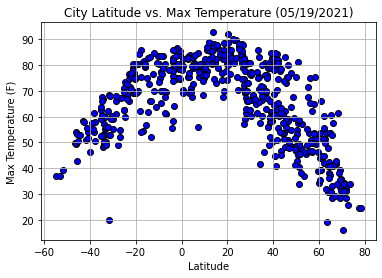

In [9]:
copy_city_data_df = city_data_df.copy()

# Plot Latitude vs. Max Temperature on a scatterplot
plt.scatter(copy_city_data_df["Latitude"], copy_city_data_df["Max Temp"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/19/2021)")
plt.savefig("../output_data/Latitudevs.Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

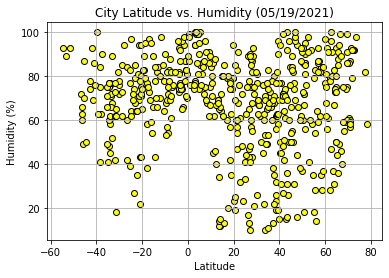

In [10]:
# Plot Latitude vs. Humidity on a scatterplot
plt.scatter(copy_city_data_df["Latitude"], copy_city_data_df["Humidity"], marker = "o", color = "yellow", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/19/2021)")
plt.savefig("../output_data/Latitude vs.Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

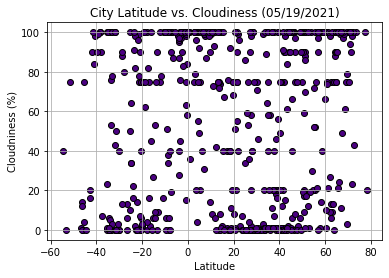

In [11]:
# Plot Latitude vs. Cloudiness on a scatterplot
plt.scatter(copy_city_data_df["Latitude"], copy_city_data_df["Cloudiness"], marker = "o", color = "indigo", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudniness (%)")
plt.title("City Latitude vs. Cloudiness (05/19/2021)")
plt.savefig("../output_data/Latitude vs.Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

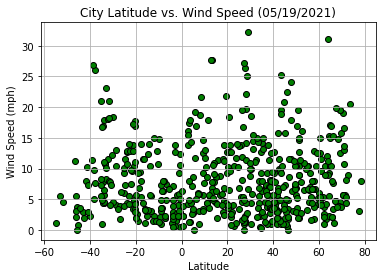

In [12]:
# Plot Latitude vs. Wind Speed on a scatterplot
plt.scatter(copy_city_data_df["Latitude"], copy_city_data_df["Wind Speed"], marker = "o", color = "green", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (05/19/2021)")
plt.savefig("../output_data/Latitude vs.Wind Speed Plot.png")
plt.show()

## Linear Regression

In [13]:
North_Hemisphere = city_data_df.loc[city_data_df["Latitude"]>0]
South_Hemisphere = city_data_df.loc[city_data_df["Latitude"]<0]

In [14]:
North_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
4,Roald,13,NO,1621730658,100,62.5833,6.1333,51.33,10.36
5,Bogdăniţa,100,RO,1621730659,74,46.4500,27.6833,58.91,1.81
9,Upernavik,43,GL,1621730225,92,72.7868,-56.1549,25.88,9.01
10,Provideniya,100,RU,1621730231,73,64.3833,-173.3000,38.17,5.50
11,Lavrentiya,21,RU,1621730222,88,65.5833,-171.0000,33.15,2.08


In [15]:
South_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Carnarvon,64,AU,1621730185,64,-24.8667,113.6333,73.47,11.50
1,Hervey Bay,10,AU,1621730657,77,-25.2986,152.8535,71.01,5.99
2,Port Elizabeth,0,ZA,1621730289,76,-33.9180,25.5701,50.00,5.75
3,Rio Bananal,100,BR,1621730658,83,-19.2650,-40.3333,69.64,2.66
6,Rocha,100,UY,1621730659,77,-34.4833,-54.3333,52.50,16.96


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

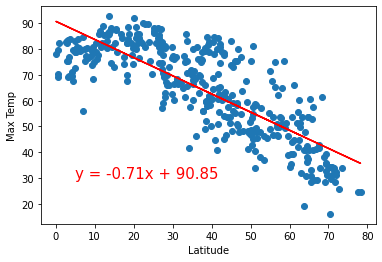

The r-squared for is: 0.6446831168676653


In [24]:
# Add the linear regression equation and line to plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = North_Hemisphere['Latitude']
y_values = North_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("../output_data/North_Hemisphere-Max-Temp.vs.Lat.png")
plt.show()
print(f"The r-squared for is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

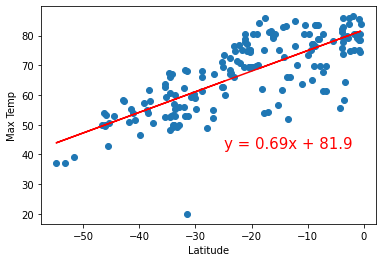

The r-squared is: 0.5804072653700421


In [25]:
# Add the linear regression equation and line to plot for Souhern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = South_Hemisphere['Latitude']
y_values = South_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,42),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("../output_data/South_Hemisphere-Max-Temp.vs.Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

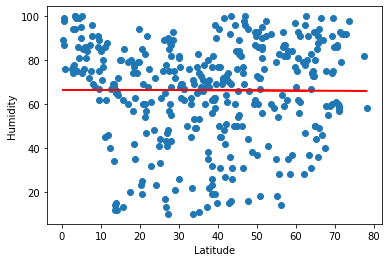

The r-squared is: 1.4736420178570219e-05


In [26]:
# Add the linear regression equation and line to plot for Northern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = North_Hemisphere['Latitude']
y_values = North_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/North_Hemisphere-Humidity.vs.Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

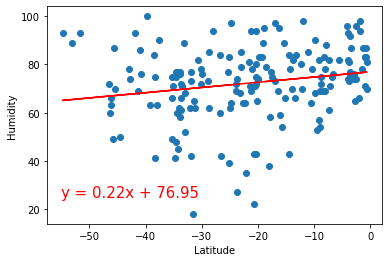

The r-squared for is: 0.03699369336334768


In [27]:
# Add the linear regression equation and line to plot for Souhern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = South_Hemisphere['Latitude']
y_values = South_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/South_Hemisphere-Humidity.vs.Lat.png")
plt.show()
print(f"The r-squared for is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

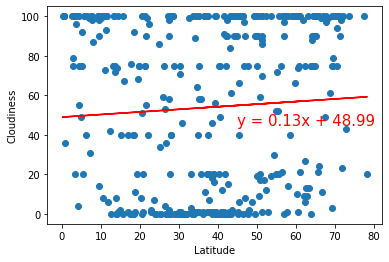

The r-squared is: 0.003968123396480917


In [28]:
# Add the linear regression equation and line to plot for Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = North_Hemisphere['Latitude']
y_values = North_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/North-Hemi-Linear_Cloudiness-vs-Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

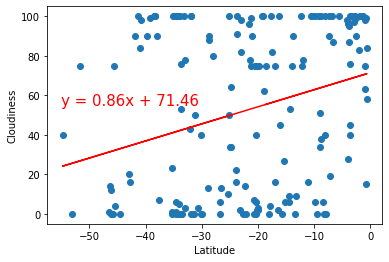

The r-squared is: 0.08178256162034603


In [29]:
# Add the linear regression equation and line to plot for Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = South_Hemisphere['Latitude']
y_values = South_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/South-Hemi-Linear_Cloudiness-vs-Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

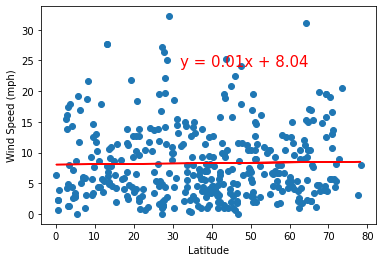

The r-squared is: 0.0004002495154490755


In [30]:
# Add the linear regression equation and line to plot for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = North_Hemisphere['Latitude']
y_values = North_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/North-Hemi-Linear_Wind-Speed-vs-Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

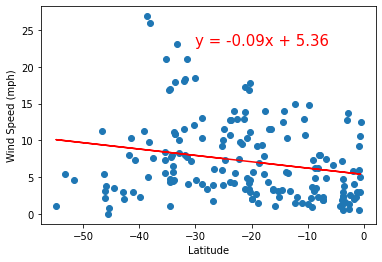

The r-squared is: 0.04844030368784126


In [31]:
# Add the linear regression equation and line to plot for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = South_Hemisphere['Latitude']
y_values = South_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/South-Hemi-Linear_Wind-Speed-vs-Lat.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")